<a href="https://colab.research.google.com/github/MagnsW/colab-Geophysics/blob/master/Infill_modeling_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os
import glob

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
filesindir = []
for file in glob.glob('/gdrive/My Drive/Colab Notebooks/input/Infill_input/*'):
    filesindir.append(file)
print(filesindir)

['/gdrive/My Drive/Colab Notebooks/input/Infill_input/Infill_input_and_output.csv']


In [0]:
filename = '/gdrive/My Drive/Colab Notebooks/input/Infill_input/Infill_input_and_output.csv'
df_raw = pd.read_csv(filename)

In [0]:
df_raw

,Vessel Name,No of streamers,Streamer separation,Streamer length,No of sources,Source depth,Spint,Q-Value,Water depth (m),Depth.Nears,Depth.NM,Depth.FM,Depth.Fars,TWT.Nears,TWT.NM,TWT.FM,TWT.Fars,Bin size,Empty_bins.Nears,Empty_bins.NM,Empty_bins.FM,Empty_bins.Fars,Perc50.Nears,Perc50.NM,Perc50.FM,Perc50.Fars,Threshold_fold.Nears,Threshold_fold.NM,Threshold_fold.FM,Threshold_fold.Fars,Fresnel_zone.Nears,Fresnel_zone.NM,Fresnel_zone.FM,Fresnel_zone.Fars
0,Hyperion,12,75.000,8025,2,7,12.500,150,100.0,1000,3000,4000,5000,940,2180,2660,3100,18.7500,1,3,4,6,2,6,7,13,92,89,89,83,182,479,595,759
1,Hyperion,12,75.000,8025,2,7,12.500,150,77.0,1356,3019,4930,4930,1130,2100,2970,2970,18.7500,1,3,4,6,2,6,9,13,92,89,89,87,225,491,691,762
2,Titan,12,150.000,8000,3,7,16.667,85,1600.0,2075,4550,4750,6450,2640,4250,4390,5360,25.0000,1,4,5,8,2,9,10,18,88,84,84,75,252,420,488,648
3,Sterling,14,50.000,6000,2,7,25.000,128,1274.0,1692,1692,2849,5011,2200,2200,3300,4500,12.5000,1,2,3,8,3,4,7,17,86,84,78,63,163,238,593,893
4,Shigen,12,75.000,4800,2,6,18.750,120,405.0,865,1268,2583,4560,1080,1500,2530,3590,18.7500,1,2,3,8,1,4,7,17,90,86,81,62,110,175,346,851
5,Shigen,12,75.000,4800,2,7,18.750,120,250.0,1000,1500,2200,4300,1160,1720,2500,4160,18.7500,1,2,3,7,2,4,6,15,90,85,83,66,137,193,304,797
6,Atlas,14,120.000,8100,2,7,25.000,120,3000.0,3000,4196,5668,8391,4020,5360,6350,8000,30.0000,1,2,3,6,1,3,6,12,90,84,82,73,183,288,502,726
7,Unknown,14,100.000,8100,2,8,25.000,110,712.5,2151,3381,5077,6609,2680,3970,5360,6430,25.0000,3,5,7,9,4,9,14,14,88,79,78,70,438,600,780,952
8,Apollo,10,150.000,7050,3,7,12.500,120,2000.0,2191,3197,4490,6412,2850,3560,4330,5190,25.0000,1,2,3,7,2,5,8,16,89,84,83,82,164,269,427,801
9,Titan,14,75.000,6525,3,7,16.667,120,66.0,600,1500,3200,6726,700,1560,3440,5830,12.5000,1,4,6,17,2,8,14,37,90,86,83,55,109,213,387,956


In [0]:
corr = df_raw.corr()

In [0]:
corr

,No of streamers,Streamer separation,Streamer length,No of sources,Source depth,Spint,Q-Value,Water depth (m),Depth.Nears,Depth.NM,Depth.FM,Depth.Fars,TWT.Nears,TWT.NM,TWT.FM,TWT.Fars,Bin size,Empty_bins.Nears,Empty_bins.NM,Empty_bins.FM,Empty_bins.Fars,Perc50.Nears,Perc50.NM,Perc50.FM,Perc50.Fars,Threshold_fold.Nears,Threshold_fold.NM,Threshold_fold.FM,Threshold_fold.Fars,Fresnel_zone.Nears,Fresnel_zone.NM,Fresnel_zone.FM,Fresnel_zone.Fars
No of streamers,1.000000,-0.400101,0.151294,-0.355036,0.342997,0.760991,-0.067035,0.088748,0.172178,0.008729,0.146913,0.384287,0.199731,0.187927,0.392289,0.517978,-0.095782,0.379980,0.355036,0.382832,0.377983,0.322771,0.090471,0.299173,0.220832,-0.227933,-0.287887,-0.447281,-0.586761,0.285242,0.129909,0.368034,0.439838
Streamer separation,-0.400101,1.000000,0.455984,0.479452,0.169980,-0.116756,-0.600572,0.651922,0.623582,0.709564,0.548817,0.481964,0.636005,0.719098,0.579265,0.449809,0.761972,0.064338,0.136358,0.058949,-0.188980,-0.141104,0.240989,0.060755,-0.167427,-0.104999,-0.327969,0.032985,0.369804,0.274294,0.186092,-0.040862,-0.280306
Streamer length,0.151294,0.455984,1.000000,-0.048759,0.551892,0.030211,0.052446,0.370705,0.603071,0.863671,0.893245,0.601198,0.505197,0.690449,0.639513,0.415936,0.571362,0.324741,0.522503,0.374881,-0.220019,0.226137,0.408849,0.226788,-0.291923,0.239196,0.003509,0.367027,0.539587,0.648561,0.820160,0.737776,0.010858
No of sources,-0.355036,0.479452,-0.048759,1.000000,0.000000,-0.541727,-0.465505,-0.006541,-0.208304,-0.081968,-0.222827,-0.145227,-0.145972,-0.103918,-0.149752,-0.111558,-0.176301,-0.254824,0.142857,0.286077,0.524958,-0.092768,0.473244,0.476283,0.635001,-0.325169,-0.182032,-0.008570,0.064390,-0.302413,-0.326039,-0.501488,-0.454714
Source depth,0.342997,0.169980,0.551892,0.000000,1.000000,0.255996,-0.126090,0.069321,0.360842,0.377370,0.410150,0.268891,0.316904,0.395703,0.448607,0.357850,0.237661,0.738549,0.621059,0.637793,0.071097,0.806599,0.527535,0.530923,-0.094219,-0.241649,-0.559553,-0.186291,0.177734,0.754551,0.626332,0.595879,0.154094
Spint,0.760991,-0.116756,0.030211,-0.541727,0.255996,1.000000,-0.291955,0.464844,0.542703,0.183219,0.256250,0.518253,0.592222,0.477741,0.613936,0.698611,0.291356,0.462158,0.094229,0.036294,-0.032341,0.305905,-0.210058,-0.069024,-0.201874,-0.391790,-0.518404,-0.692384,-0.568750,0.412236,0.085179,0.344526,0.535778
Q-Value,-0.067035,-0.600572,0.052446,-0.465505,-0.126090,-0.291955,1.000000,-0.378767,-0.306577,-0.254283,-0.044270,-0.254656,-0.399485,-0.413710,-0.369953,-0.438167,-0.335451,-0.221945,-0.308887,-0.308944,-0.250262,-0.094359,-0.396662,-0.311609,-0.210739,0.594917,0.670766,0.530600,0.342600,-0.225627,0.114683,0.255229,0.111445
Water depth (m),0.088748,0.651922,0.370705,-0.006541,0.069321,0.464844,-0.378767,1.000000,0.905334,0.655321,0.591315,0.700945,0.944021,0.861494,0.807179,0.734573,0.731122,-0.037864,-0.224067,-0.323284,-0.345670,-0.185739,-0.320967,-0.341853,-0.348038,-0.261001,-0.329281,-0.276002,0.076977,0.164948,-0.001262,0.109053,-0.009625
Depth.Nears,0.172178,0.623582,0.603071,-0.208304,0.360842,0.542703,-0.306577,0.905334,1.000000,0.822392,0.807826,0.762609,0.985812,0.959046,0.915056,0.765705,0.845058,0.289502,0.044612,-0.105139,-0.453426,0.102073,-0.131710,-0.199092,-0.532628,-0.178089,-0.397786,-0.220552,0.210455,0.543472,0.384595,0.469765,0.126184
Depth.NM,0.008729,0.709564,0.863671,-0.081968,0.377370,0.183219,-0.254283,0.655321,0.822392,1.000000,0.923252,0.721099,0.755751,0.900485,0.781020,0.581052,0.842609,0.232343,0.340850,0.124699,-0.424027,0.047034,0.223789,-0.046062,-0.473385,0.142991,-0.103538,0.241045,0.455736,0.621744,0.676434,0.554790,-0.018146


In [0]:
corr.style.background_gradient(cmap='coolwarm')

,No of streamers,Streamer separation,Streamer length,No of sources,Source depth,Spint,Q-Value,Water depth (m),Depth.Nears,Depth.NM,Depth.FM,Depth.Fars,TWT.Nears,TWT.NM,TWT.FM,TWT.Fars,Bin size,Empty_bins.Nears,Empty_bins.NM,Empty_bins.FM,Empty_bins.Fars,Perc50.Nears,Perc50.NM,Perc50.FM,Perc50.Fars,Threshold_fold.Nears,Threshold_fold.NM,Threshold_fold.FM,Threshold_fold.Fars,Fresnel_zone.Nears,Fresnel_zone.NM,Fresnel_zone.FM,Fresnel_zone.Fars
No of streamers,1,-0.400101,0.151294,-0.355036,0.342997,0.760991,-0.0670352,0.0887477,0.172178,0.00872918,0.146913,0.384287,0.199731,0.187927,0.392289,0.517978,-0.0957824,0.37998,0.355036,0.382832,0.377983,0.322771,0.0904715,0.299173,0.220832,-0.227933,-0.287887,-0.447281,-0.586761,0.285242,0.129909,0.368034,0.439838
Streamer separation,-0.400101,1,0.455984,0.479452,0.16998,-0.116756,-0.600572,0.651922,0.623582,0.709564,0.548817,0.481964,0.636005,0.719098,0.579265,0.449809,0.761972,0.0643384,0.136358,0.058949,-0.18898,-0.141104,0.240989,0.060755,-0.167427,-0.104999,-0.327969,0.0329851,0.369804,0.274294,0.186092,-0.0408621,-0.280306
Streamer length,0.151294,0.455984,1,-0.0487592,0.551892,0.0302112,0.0524458,0.370705,0.603071,0.863671,0.893245,0.601198,0.505197,0.690449,0.639513,0.415936,0.571362,0.324741,0.522503,0.374881,-0.220019,0.226137,0.408849,0.226788,-0.291923,0.239196,0.00350923,0.367027,0.539587,0.648561,0.82016,0.737776,0.0108579
No of sources,-0.355036,0.479452,-0.0487592,1,0,-0.541727,-0.465505,-0.00654148,-0.208304,-0.0819682,-0.222827,-0.145227,-0.145972,-0.103918,-0.149752,-0.111558,-0.176301,-0.254824,0.142857,0.286077,0.524958,-0.0927677,0.473244,0.476283,0.635001,-0.325169,-0.182032,-0.0085702,0.0643902,-0.302413,-0.326039,-0.501488,-0.454714
Source depth,0.342997,0.16998,0.551892,0,1,0.255996,-0.12609,0.069321,0.360842,0.37737,0.41015,0.268891,0.316904,0.395703,0.448607,0.35785,0.237661,0.738549,0.621059,0.637793,0.0710968,0.806599,0.527535,0.530923,-0.0942189,-0.241649,-0.559553,-0.186291,0.177734,0.754551,0.626332,0.595879,0.154094
Spint,0.760991,-0.116756,0.0302112,-0.541727,0.255996,1,-0.291955,0.464844,0.542703,0.183219,0.25625,0.518253,0.592222,0.477741,0.613936,0.698611,0.291356,0.462158,0.0942288,0.0362944,-0.0323407,0.305905,-0.210058,-0.0690238,-0.201874,-0.39179,-0.518404,-0.692384,-0.56875,0.412236,0.0851789,0.344526,0.535778
Q-Value,-0.0670352,-0.600572,0.0524458,-0.465505,-0.12609,-0.291955,1,-0.378767,-0.306577,-0.254283,-0.0442705,-0.254656,-0.399485,-0.41371,-0.369953,-0.438167,-0.335451,-0.221945,-0.308887,-0.308944,-0.250262,-0.0943588,-0.396662,-0.311609,-0.210739,0.594917,0.670766,0.5306,0.3426,-0.225627,0.114683,0.255229,0.111445
Water depth (m),0.0887477,0.651922,0.370705,-0.00654148,0.069321,0.464844,-0.378767,1,0.905334,0.655321,0.591315,0.700945,0.944021,0.861494,0.807179,0.734573,0.731122,-0.0378635,-0.224067,-0.323284,-0.34567,-0.185739,-0.320967,-0.341853,-0.348038,-0.261001,-0.329281,-0.276002,0.0769767,0.164948,-0.00126152,0.109053,-0.00962517
Depth.Nears,0.172178,0.623582,0.603071,-0.208304,0.360842,0.542703,-0.306577,0.905334,1,0.822392,0.807826,0.762609,0.985812,0.959046,0.915056,0.765705,0.845058,0.289502,0.0446117,-0.105139,-0.453426,0.102073,-0.13171,-0.199092,-0.532628,-0.178089,-0.397786,-0.220552,0.210455,0.543472,0.384595,0.469765,0.126184
Depth.NM,0.00872918,0.709564,0.863671,-0.0819682,0.37737,0.183219,-0.254283,0.655321,0.822392,1,0.923252,0.721099,0.755751,0.900485,0.78102,0.581052,0.842609,0.232343,0.34085,0.124699,-0.424027,0.0470337,0.223789,-0.0460622,-0.473385,0.142991,-0.103538,0.241045,0.455736,0.621744,0.676434,0.55479,-0.0181464


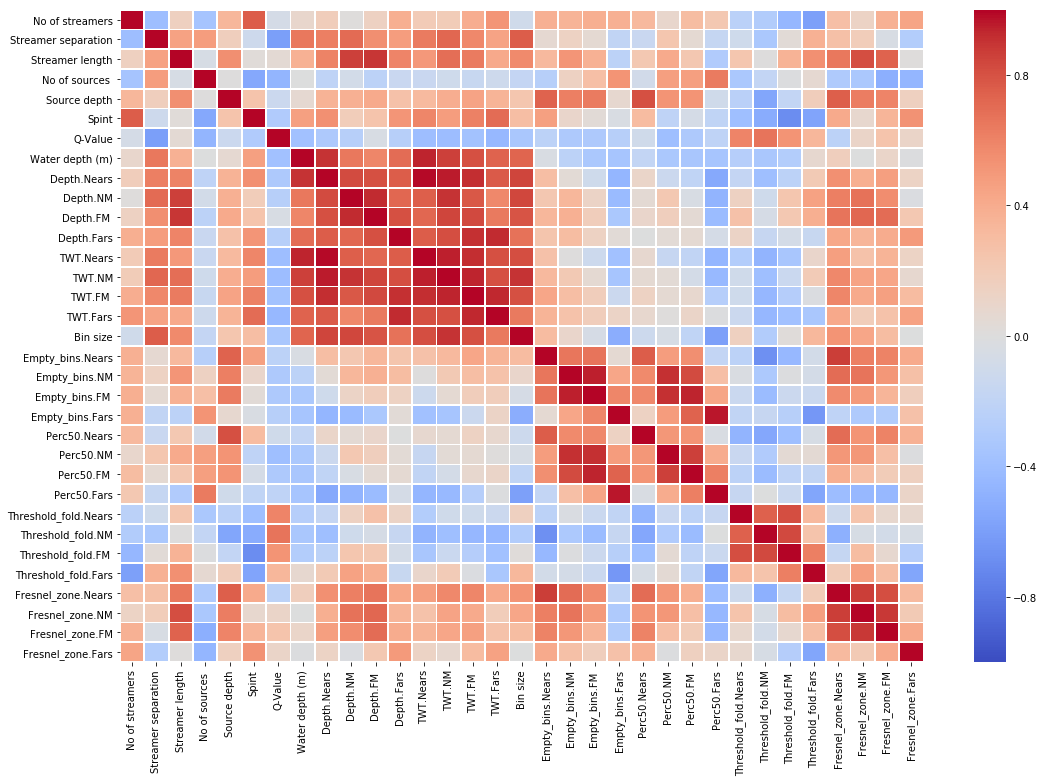

In [0]:
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr, vmin=-1, vmax=1, fmt='g', cmap='coolwarm', linewidths=0.75 );

In [0]:
df_input = df_raw[['No of streamers', 'Streamer separation',
       'Streamer length', 'No of sources ', 'Source depth', 'Spint', 'Q-Value',
       'Water depth (m)', 'Depth.Nears', 'Depth.NM', 'Depth.FM ', 'Depth.Fars',
       'TWT.Nears', 'TWT.NM', 'TWT.FM ', 'TWT.Fars', 'Bin size']]

In [0]:
s_input = df_input.to_numpy()

In [0]:
df_raw.columns

Index(['Vessel Name', 'No of streamers', 'Streamer separation',
       'Streamer length', 'No of sources ', 'Source depth', 'Spint', 'Q-Value',
       'Water depth (m)', 'Depth.Nears', 'Depth.NM', 'Depth.FM ', 'Depth.Fars',
       'TWT.Nears', 'TWT.NM', 'TWT.FM ', 'TWT.Fars', 'Bin size',
       'Empty_bins.Nears', 'Empty_bins.NM', 'Empty_bins.FM ',
       'Empty_bins.Fars', 'Perc50.Nears', 'Perc50.NM', 'Perc50.FM ',
       'Perc50.Fars', 'Threshold_fold.Nears', 'Threshold_fold.NM',
       'Threshold_fold.FM ', 'Threshold_fold.Fars', 'Fresnel_zone.Nears',
       'Fresnel_zone.NM', 'Fresnel_zone.FM', 'Fresnel_zone.Fars'],
      dtype='object')

In [0]:
df_input

,No of streamers,Streamer separation,Streamer length,No of sources,Source depth,Spint,Q-Value,Water depth (m),Depth.Nears,Depth.NM,Depth.FM,Depth.Fars,TWT.Nears,TWT.NM,TWT.FM,TWT.Fars,Bin size
0,12,75.000,8025,2,7,12.500,150,100.0,1000,3000,4000,5000,940,2180,2660,3100,18.7500
1,12,75.000,8025,2,7,12.500,150,77.0,1356,3019,4930,4930,1130,2100,2970,2970,18.7500
2,12,150.000,8000,3,7,16.667,85,1600.0,2075,4550,4750,6450,2640,4250,4390,5360,25.0000
3,14,50.000,6000,2,7,25.000,128,1274.0,1692,1692,2849,5011,2200,2200,3300,4500,12.5000
4,12,75.000,4800,2,6,18.750,120,405.0,865,1268,2583,4560,1080,1500,2530,3590,18.7500
5,12,75.000,4800,2,7,18.750,120,250.0,1000,1500,2200,4300,1160,1720,2500,4160,18.7500
6,14,120.000,8100,2,7,25.000,120,3000.0,3000,4196,5668,8391,4020,5360,6350,8000,30.0000
7,14,100.000,8100,2,8,25.000,110,712.5,2151,3381,5077,6609,2680,3970,5360,6430,25.0000
8,10,150.000,7050,3,7,12.500,120,2000.0,2191,3197,4490,6412,2850,3560,4330,5190,25.0000
9,14,75.000,6525,3,7,16.667,120,66.0,600,1500,3200,6726,700,1560,3440,5830,12.5000


In [0]:
output_Empty_bins_nears = df_raw['Empty_bins.Nears']
output_Empty_bins_fars = df_raw['Empty_bins.Fars']

In [0]:
output_Empty_range_fars = output_Empty_bins_fars*df_raw['Bin size']

In [0]:
output_Empty_range_fars

0     112.500
1     112.500
2     200.000
3     100.000
4     150.000
5     131.250
6     180.000
7     225.000
8     175.000
9     212.500
10    140.625
11    140.625
dtype: float64

In [0]:
output_Empty_range_fars = np.array(output_Empty_range_fars)

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=(17,))])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(s_input, output_Empty_bins_fars, epochs=5)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/5
12/12 [==============================] - 0s 42ms/sample - loss: 1520487.0000
Epoch 2/5
12/12 [==============================] - 0s 545us/sample - loss: 892778702742487040.0000
Epoch 3/5
12/12 [==============================] - 0s 551us/sample - loss: 8031186779748328347833406062592.0000
Epoch 4/5
12/12 [==============================] - 0s 184us/sample - loss: inf
Epoch 5/5
12/12 [==============================] - 0s 171us/sample - loss: inf


In [0]:
s_input.shape

(12, 17)

In [0]:
#df_input = df_raw[['Streamer length', 'Q-Value', 'Depth.Fars']]
#s_input = df_input.to_numpy()

In [0]:
df_input

,No of streamers,Streamer separation,Streamer length,No of sources,Source depth,Spint,Q-Value,Water depth (m),Depth.Nears,Depth.NM,Depth.FM,Depth.Fars,TWT.Nears,TWT.NM,TWT.FM,TWT.Fars,Bin size
0,12,75.000,8025,2,7,12.500,150,100.0,1000,3000,4000,5000,940,2180,2660,3100,18.7500
1,12,75.000,8025,2,7,12.500,150,77.0,1356,3019,4930,4930,1130,2100,2970,2970,18.7500
2,12,150.000,8000,3,7,16.667,85,1600.0,2075,4550,4750,6450,2640,4250,4390,5360,25.0000
3,14,50.000,6000,2,7,25.000,128,1274.0,1692,1692,2849,5011,2200,2200,3300,4500,12.5000
4,12,75.000,4800,2,6,18.750,120,405.0,865,1268,2583,4560,1080,1500,2530,3590,18.7500
5,12,75.000,4800,2,7,18.750,120,250.0,1000,1500,2200,4300,1160,1720,2500,4160,18.7500
6,14,120.000,8100,2,7,25.000,120,3000.0,3000,4196,5668,8391,4020,5360,6350,8000,30.0000
7,14,100.000,8100,2,8,25.000,110,712.5,2151,3381,5077,6609,2680,3970,5360,6430,25.0000
8,10,150.000,7050,3,7,12.500,120,2000.0,2191,3197,4490,6412,2850,3560,4330,5190,25.0000
9,14,75.000,6525,3,7,16.667,120,66.0,600,1500,3200,6726,700,1560,3440,5830,12.5000


In [0]:
s_input_norm = keras.utils.normalize(s_input, axis=0)

In [0]:
s_input_norm

array([[0.27588029, 0.22027101, 0.33601846, 0.23408229, 0.28818544,
        0.19977758, 0.35208067, 0.02355061, 0.17770167, 0.31502086,
        0.29824834, 0.25896964, 0.13304708, 0.21689857, 0.20568413,
        0.18616342, 0.26688818],
       [0.27588029, 0.22027101, 0.33601846, 0.23408229, 0.28818544,
        0.19977758, 0.35208067, 0.01813397, 0.24096347, 0.31701599,
        0.36759108, 0.25534407, 0.15993958, 0.20893899, 0.22965484,
        0.17835657, 0.26688818],
       [0.27588029, 0.44054202, 0.33497167, 0.35112344, 0.28818544,
        0.26637543, 0.19951238, 0.37680982, 0.36873097, 0.47778164,
        0.35416991, 0.33407084, 0.37366415, 0.42285271, 0.33945614,
        0.32188256, 0.3558509 ],
       [0.32186034, 0.14684734, 0.25122875, 0.23408229, 0.28818544,
        0.39955516, 0.30044217, 0.30003482, 0.30067123, 0.17767177,
        0.21242738, 0.25953938, 0.31138679, 0.21888846, 0.25517204,
        0.27023723, 0.17792545],
       [0.27588029, 0.22027101, 0.200983  , 0.234082

In [0]:
s_output_norm = keras.utils.normalize(output_Empty_range_fars)

In [0]:
input_norm_factor = s_input / s_input_norm

In [0]:
output_norm_factor = output_Empty_range_fars / s_output_norm

In [0]:
sgd = keras.optimizers.SGD(lr=0.1, clipvalue=0.2)
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=(17,))])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(s_input_norm, s_output_norm.T, epochs=500)


Epoch 1/500
12/12 [==============================] - 0s 5ms/sample - loss: 0.5936
Epoch 2/500
12/12 [==============================] - 0s 184us/sample - loss: 0.5416
Epoch 3/500
12/12 [==============================] - 0s 180us/sample - loss: 0.4942
Epoch 4/500
12/12 [==============================] - 0s 175us/sample - loss: 0.4511
Epoch 5/500
12/12 [==============================] - 0s 173us/sample - loss: 0.4118
Epoch 6/500
12/12 [==============================] - 0s 165us/sample - loss: 0.3760
Epoch 7/500
12/12 [==============================] - 0s 170us/sample - loss: 0.3435
Epoch 8/500
12/12 [==============================] - 0s 171us/sample - loss: 0.3138
Epoch 9/500
12/12 [==============================] - 0s 173us/sample - loss: 0.2867
Epoch 10/500
12/12 [==============================] - 0s 168us/sample - loss: 0.2621
Epoch 11/500
12/12 [==============================] - 0s 156us/sample - loss: 0.2397
Epoch 12/500
12/12 [==============================] - 0s 157us/sample - loss

In [0]:
validation_test = np.array([[12],[84.375],[6000],[3],[7],[12.500],[120],[215.0],[750],[1350],[2130],[2918],[860],[1440],[2110],[2590],[14.0625]])
validation_test_norm = np.multiply(validation_test.T, 1/input_norm_factor[0])
prediction=model.predict(validation_test_norm)

In [0]:
input_norm_factor

array([[4.34971263e+01, 3.40489652e+02, 2.38826166e+04, 8.54400375e+00,
        2.42899156e+01, 6.25695835e+01, 4.26038731e+02, 4.24617384e+03,
        5.62740900e+03, 9.52317883e+03, 1.34116421e+04, 1.93072823e+04,
        7.06516808e+03, 1.00507811e+04, 1.29324514e+04, 1.66520359e+04,
        7.02541424e+01],
       [4.34971263e+01, 3.40489652e+02, 2.38826166e+04, 8.54400375e+00,
        2.42899156e+01, 6.25695835e+01, 4.26038731e+02, 4.24617384e+03,
        5.62740900e+03, 9.52317883e+03, 1.34116421e+04, 1.93072823e+04,
        7.06516808e+03, 1.00507811e+04, 1.29324514e+04, 1.66520359e+04,
        7.02541424e+01],
       [4.34971263e+01, 3.40489652e+02, 2.38826166e+04, 8.54400375e+00,
        2.42899156e+01, 6.25695835e+01, 4.26038731e+02, 4.24617384e+03,
        5.62740900e+03, 9.52317883e+03, 1.34116421e+04, 1.93072823e+04,
        7.06516808e+03, 1.00507811e+04, 1.29324514e+04, 1.66520359e+04,
        7.02541424e+01],
       [4.34971263e+01, 3.40489652e+02, 2.38826166e+04, 8.544

In [0]:
np.multiply(prediction,output_norm_factor)[0][0]

86.59636266036908

In [0]:
test_input = np.array([[1, 3, 5, 7, 7, 8, 9], [3, 6, 7, 5, 3, 4, 7]]) * 2000
test_output = test_input[0,:] * 4 + test_input[1,:] * 7

In [0]:
test_input.T

array([[ 2000,  6000],
       [ 6000, 12000],
       [10000, 14000],
       [14000, 10000],
       [14000,  6000],
       [16000,  8000],
       [18000, 14000]])

In [0]:
test_input_norm = keras.utils.normalize(test_input)
test_output_norm = keras.utils.normalize(test_output)

In [0]:
test_output_norm.T

array([[0.15656528],
       [0.33818101],
       [0.43212018],
       [0.39454451],
       [0.30686795],
       [0.37575668],
       [0.53232196]])

In [0]:
test_output.T

array([ 50000, 108000, 138000, 126000,  98000, 120000, 170000])

In [0]:
sgd = keras.optimizers.SGD(lr=0.01, clipnorm=1.)
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=(2,))])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(test_input_norm.T, test_output_norm.T, epochs=20)

Epoch 1/20
7/7 [==============================] - 0s 28ms/sample - loss: 0.5262
Epoch 2/20
7/7 [==============================] - 0s 577us/sample - loss: 0.5022
Epoch 3/20
7/7 [==============================] - 0s 960us/sample - loss: 0.4794
Epoch 4/20
7/7 [==============================] - 0s 876us/sample - loss: 0.4577
Epoch 5/20
7/7 [==============================] - 0s 798us/sample - loss: 0.4371
Epoch 6/20
7/7 [==============================] - 0s 567us/sample - loss: 0.4175
Epoch 7/20
7/7 [==============================] - 0s 843us/sample - loss: 0.3989
Epoch 8/20
7/7 [==============================] - 0s 833us/sample - loss: 0.3812
Epoch 9/20
7/7 [==============================] - 0s 487us/sample - loss: 0.3644
Epoch 10/20
7/7 [==============================] - 0s 353us/sample - loss: 0.3484
Epoch 11/20
7/7 [==============================] - 0s 630us/sample - loss: 0.3332
Epoch 12/20
7/7 [==============================] - 0s 882us/sample - loss: 0.3187
Epoch 13/20
7/7 [=========

In [0]:
validation_test = np.array([[128], [62]])
prediction=model.predict(validation_test.T)

In [0]:
prediction

array([[-4.5016284]], dtype=float32)

In [0]:
test_output

array([ 50000, 108000, 138000, 126000,  98000, 120000, 170000])

In [0]:
128*4+62*7

946

In [0]:
keras.utils.to_categorical(output_Empty_bins_fars)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0

In [0]:
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(17,)),
    keras.layers.Dense(18, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(s_input_norm, keras.utils.to_categorical(output_Empty_bins_fars), epochs=500)


In [0]:
output_Empty_bins_nears

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     3
8     1
9     1
10    1
11    1
Name: Empty_bins.Nears, dtype: int64

In [0]:
keras.utils.to_categorical(output_Empty_bins_nears)

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [0]:
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(17,)),
    keras.layers.Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(s_input_norm, keras.utils.to_categorical(output_Empty_bins_nears), epochs=500)


Epoch 1/500
12/12 [==============================] - 0s 6ms/sample - loss: 1.3698 - acc: 0.6667
Epoch 2/500
12/12 [==============================] - 0s 167us/sample - loss: 1.3646 - acc: 0.6667
Epoch 3/500
12/12 [==============================] - 0s 195us/sample - loss: 1.3594 - acc: 0.6667
Epoch 4/500
12/12 [==============================] - 0s 175us/sample - loss: 1.3543 - acc: 0.7500
Epoch 5/500
12/12 [==============================] - 0s 299us/sample - loss: 1.3491 - acc: 0.7500
Epoch 6/500
12/12 [==============================] - 0s 310us/sample - loss: 1.3439 - acc: 0.7500
Epoch 7/500
12/12 [==============================] - 0s 187us/sample - loss: 1.3388 - acc: 0.7500
Epoch 8/500
12/12 [==============================] - 0s 301us/sample - loss: 1.3337 - acc: 0.7500
Epoch 9/500
12/12 [==============================] - 0s 192us/sample - loss: 1.3286 - acc: 0.8333
Epoch 10/500
12/12 [==============================] - 0s 188us/sample - loss: 1.3235 - acc: 0.8333
Epoch 11/500
12/12 [=

In [0]:
output_Empty_bins_NM = df_raw['Empty_bins.NM']
output_Empty_bins_FM = df_raw['Empty_bins.FM ']

In [0]:
df_raw['Empty_bins.NM']

0     3
1     3
2     4
3     2
4     2
5     2
6     2
7     5
8     2
9     4
10    2
11    3
Name: Empty_bins.NM, dtype: int64

In [0]:
keras.utils.to_categorical(output_Empty_bins_NM)

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [0]:
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(17,)),
    keras.layers.Dense(6, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(s_input_norm, keras.utils.to_categorical(output_Empty_bins_NM), epochs=500)

In [0]:
keras.utils.to_categorical(output_Empty_bins_FM)

array([[0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [0]:
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(17,)),
    keras.layers.Dense(8, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(s_input_norm, keras.utils.to_categorical(output_Empty_bins_FM), epochs=500)

In [0]:
validation_test = np.array([[12],[84.375],[6000],[3],[7],[12.500],[120],[215.0],[750],[1350],[2130],[2918],[860],[1440],[2110],[2590],[14.0625]])
validation_test_norm = np.multiply(validation_test.T, 1/input_norm_factor[0])
prediction=model.predict(validation_test_norm)

In [0]:
validation_test.shape

(17, 1)

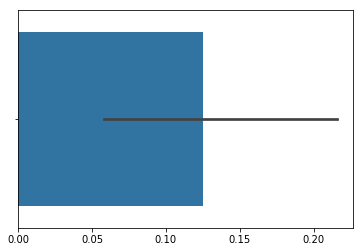

In [0]:
df_prediction = pd.DataFrame(prediction.T, columns=['Probability'])

In [0]:
df_prediction['Allowed Empty bins - FM'] = df_prediction.index

In [0]:
df_prediction

,Probability,Allowed Empty bins - FM
0,0.046071,0
1,0.020005,1
2,0.024291,2
3,0.385697,3
4,0.182876,4
5,0.162821,5
6,0.083269,6
7,0.094970,7


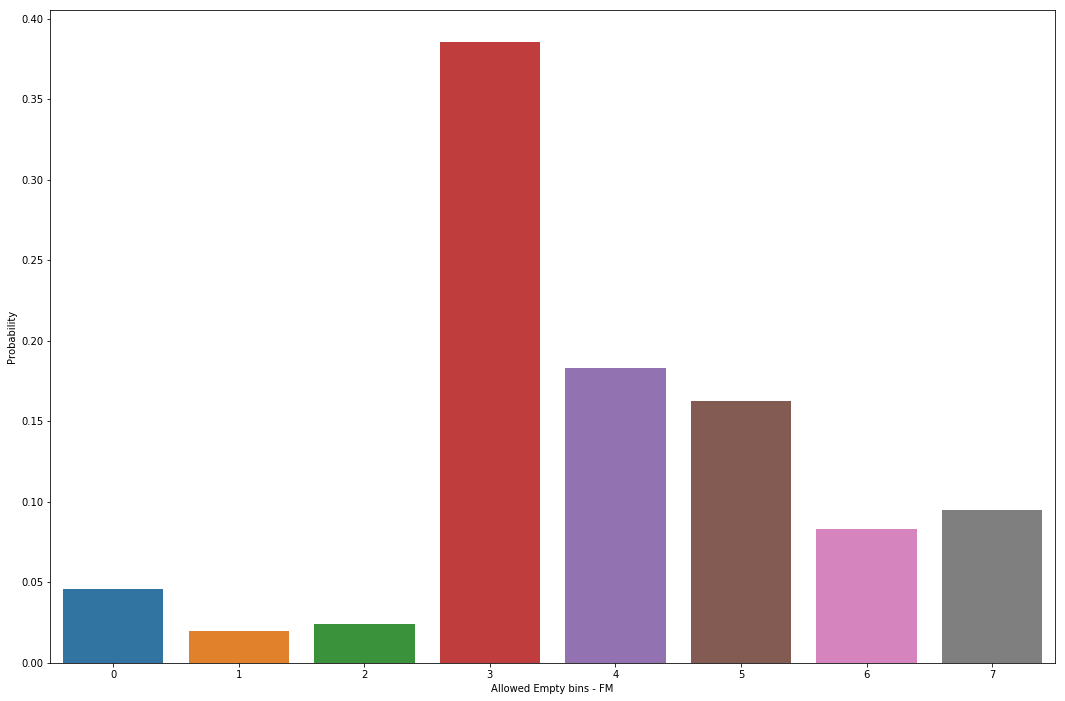

In [0]:

f, ax = plt.subplots(figsize=(18, 12))
sns.barplot(x=df_prediction['Allowed Empty bins - FM'], y=df_prediction['Probability'])

In [0]:
input

<bound method Kernel.raw_input of <google.colab._kernel.Kernel object at 0x7f52c522f198>>

In [0]:
df_input.iloc[7]

No of streamers          14.0
Streamer separation     100.0
Streamer length        8100.0
No of sources             2.0
Source depth              8.0
Spint                    25.0
Q-Value                 110.0
Water depth (m)         712.5
Depth.Nears            2151.0
Depth.NM               3381.0
Depth.FM               5077.0
Depth.Fars             6609.0
TWT.Nears              2680.0
TWT.NM                 3970.0
TWT.FM                 5360.0
TWT.Fars               6430.0
Bin size                 25.0
Name: 7, dtype: float64

In [0]:
df_input.iloc[7].values

array([1.400e+01, 1.000e+02, 8.100e+03, 2.000e+00, 8.000e+00, 2.500e+01,
       1.100e+02, 7.125e+02, 2.151e+03, 3.381e+03, 5.077e+03, 6.609e+03,
       2.680e+03, 3.970e+03, 5.360e+03, 6.430e+03, 2.500e+01])

In [0]:
validation_test = df_input.iloc[7].values.T

In [0]:
validation_test = validation_test.reshape(17,1)

In [0]:
validation_test_norm = np.multiply(validation_test.T, 1/input_norm_factor[0])
prediction=model.predict(validation_test_norm)

In [0]:
validation_test_norm.shape

(1, 17)

In [0]:
df_prediction = pd.DataFrame(prediction.T, columns=['Probability'])
df_prediction['Allowed Empty bins - FM'] = df_prediction.index

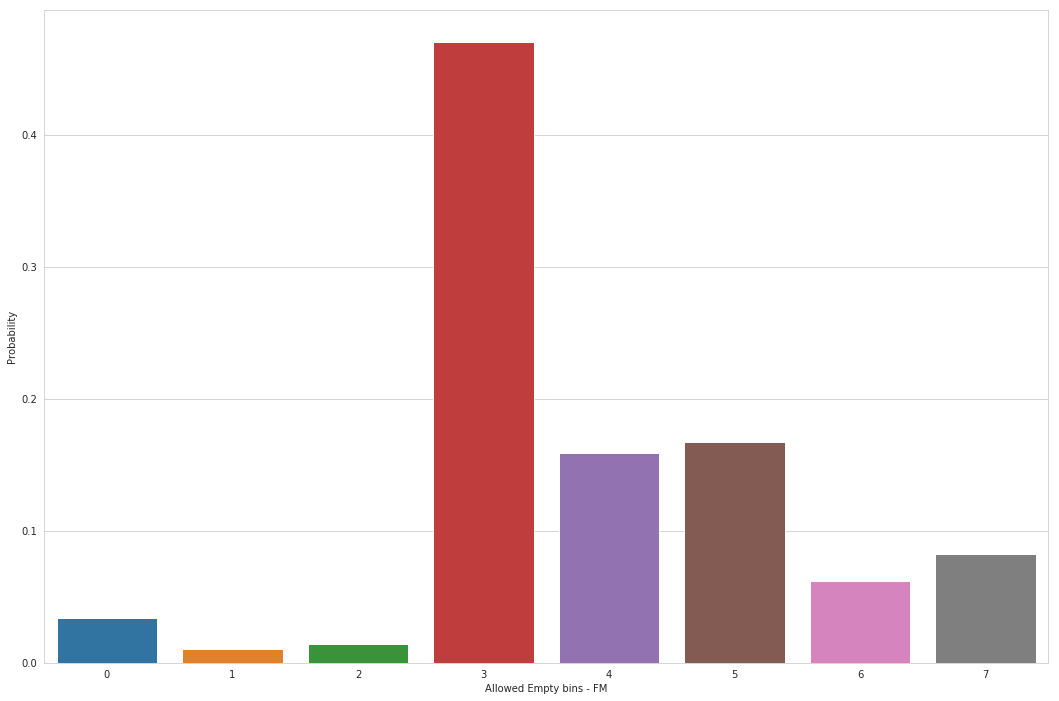

In [0]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(18, 12))
sns.barplot(x=df_prediction['Allowed Empty bins - FM'], y=df_prediction['Probability'])
plt.show()

In [0]:
def validation_test(model, df_input, sample_no):
  print(df_input.iloc[sample_no])
  validation_test = df_input.iloc[sample_no].values.T
  validation_test = validation_test.reshape(17,1)
  validation_test_norm = np.multiply(validation_test.T, 1/input_norm_factor[0])
  prediction=model.predict(validation_test_norm)
  df_prediction = pd.DataFrame(prediction.T, columns=['Probability'])
  df_prediction['Allowed Empty bins - FM'] = df_prediction.index
  sns.set_style('whitegrid')
  f, ax = plt.subplots(figsize=(18, 12))
  plt.title('Validation Test ' + str(sample_no))
  plt.ylim(0, 0.6)
  sns.barplot(x=df_prediction['Allowed Empty bins - FM'], y=df_prediction['Probability'])
  plt.show()
  
  

No of streamers          14.0
Streamer separation     100.0
Streamer length        8100.0
No of sources             2.0
Source depth              8.0
Spint                    25.0
Q-Value                 110.0
Water depth (m)         712.5
Depth.Nears            2151.0
Depth.NM               3381.0
Depth.FM               5077.0
Depth.Fars             6609.0
TWT.Nears              2680.0
TWT.NM                 3970.0
TWT.FM                 5360.0
TWT.Fars               6430.0
Bin size                 25.0
Name: 7, dtype: float64


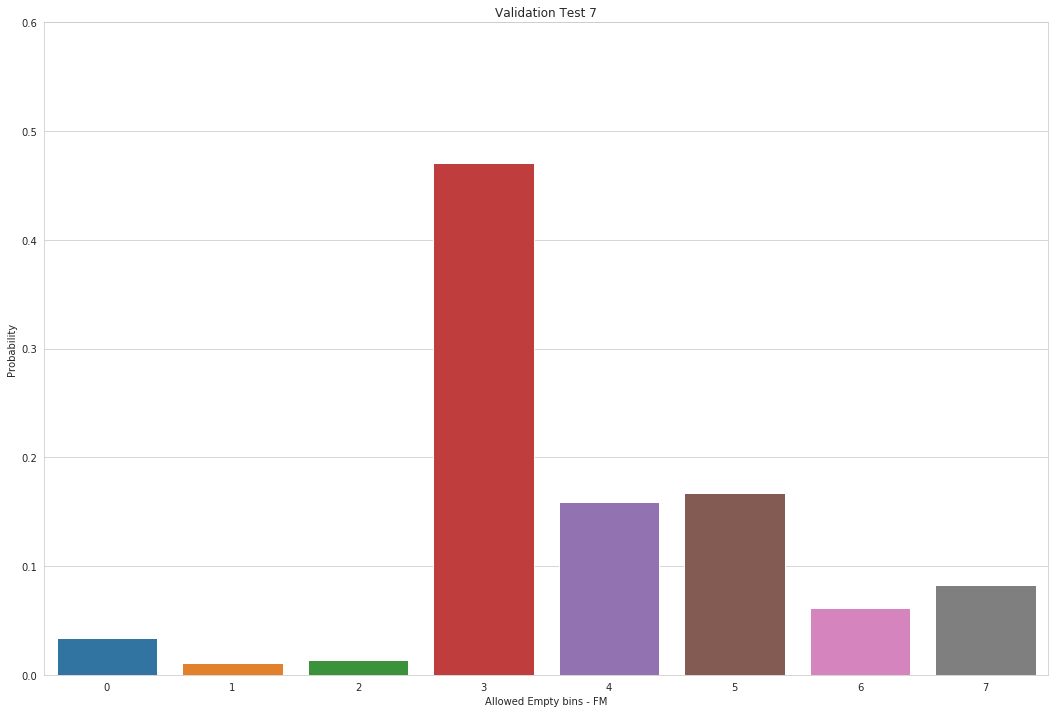

In [0]:
validation_test(model, df_input, 7)

No of streamers          12.0000
Streamer separation      84.3750
Streamer length        6000.0000
No of sources             3.0000
Source depth              7.0000
Spint                    12.5000
Q-Value                 120.0000
Water depth (m)         215.0000
Depth.Nears             750.0000
Depth.NM               1350.0000
Depth.FM               2130.0000
Depth.Fars             2918.0000
TWT.Nears               860.0000
TWT.NM                 1440.0000
TWT.FM                 2110.0000
TWT.Fars               2590.0000
Bin size                 14.0625
Name: 11, dtype: float64


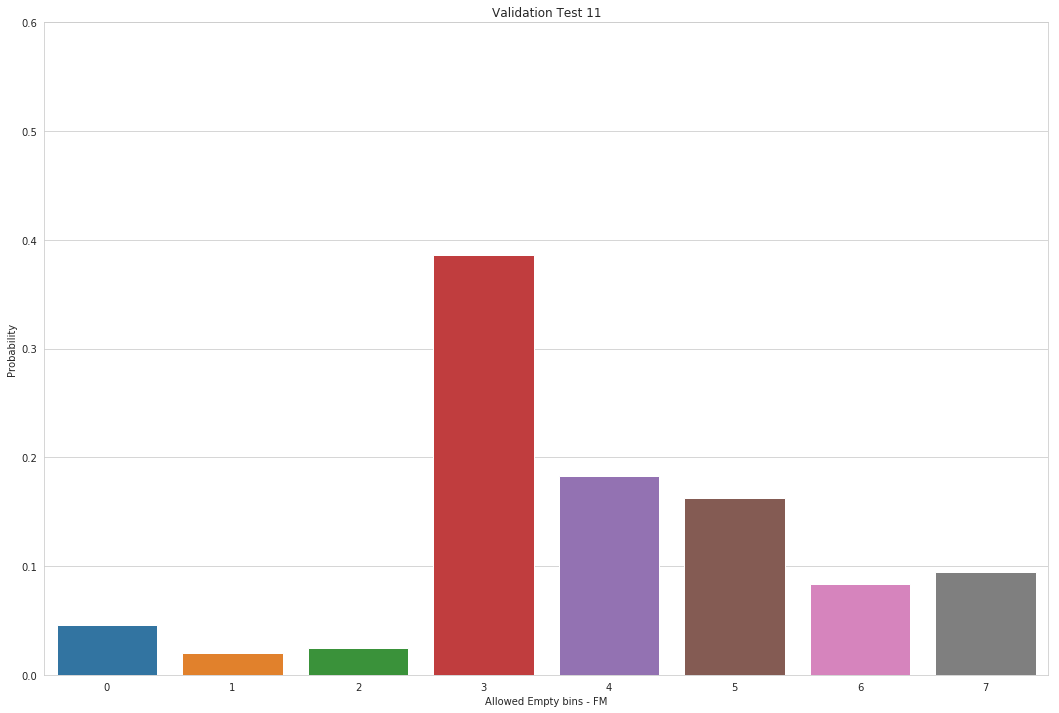

In [0]:
validation_test(model, df_input, 11)

In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 18        
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 8         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________
